In [13]:
import pandas as pd
import seaborn as sns
import json

In [5]:
gene_corr = pd.read_pickle("data/cell_correlation_above_0-5.pkl")

In [14]:
with open('data/cell_line_disease_groups.json') as f:
  metadata = json.load(f)

In [8]:
gene_corr.head()

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.670811,0.634086,0.668743,0.627837,0.683202,0.674804,0.645831,0.678091,0.644843,...,0.674436,0.515364,0.682904,0.679575,0.653029,0.684327,0.600411,0.645787,0.694980,0.647552
ACH-000005,0.670811,1.000000,0.595817,0.612021,0.618527,0.637441,0.647392,0.605953,0.637074,0.631191,...,0.645563,0.508010,0.619845,0.642149,0.633958,0.655382,0.576940,0.615256,0.655533,0.635836
ACH-000007,0.634086,0.595817,1.000000,0.689916,0.659210,0.689017,0.686473,0.656473,0.689560,0.664908,...,0.662469,0.506101,0.665620,0.682570,0.668785,0.687120,0.623574,0.662435,0.697441,0.678311
ACH-000009,0.668743,0.612021,0.689916,1.000000,0.674617,0.745205,0.724943,0.690675,0.731248,0.682845,...,0.678239,0.542141,0.690460,0.706106,0.697572,0.726958,0.637741,0.685768,0.739834,0.726810
ACH-000011,0.627837,0.618527,0.659210,0.674617,1.000000,0.689373,0.700604,0.676628,0.684779,0.670969,...,0.672168,0.552894,0.666295,0.684159,0.700965,0.712906,0.643263,0.688556,0.730965,0.731748


In [16]:
metadata["Leukemia"]

['ACH-000004',
 'ACH-000005',
 'ACH-000045',
 'ACH-000070',
 'ACH-000782',
 'ACH-000938',
 'ACH-000113',
 'ACH-000146',
 'ACH-000960',
 'ACH-000168',
 'ACH-000183',
 'ACH-000198',
 'ACH-000263',
 'ACH-000294',
 'ACH-000295',
 'ACH-000326',
 'ACH-000336',
 'ACH-000937',
 'ACH-000362',
 'ACH-000363',
 'ACH-000387',
 'ACH-000406',
 'ACH-000487',
 'ACH-000498',
 'ACH-000557',
 'ACH-000604',
 'ACH-000770',
 'ACH-000953',
 'ACH-000983',
 'ACH-001737',
 'ACH-001735',
 'ACH-001736',
 'ACH-000151']

In [29]:
i = 0
lens = []
names = []
for k in metadata.keys():
    lenk = len(metadata[k])
    i = i + lenk
    lens.append(lenk)
    names.append(k)
    print(k + ": " + str(lenk))
cl_sites = pd.Series(lens, index=names)

Leukemia: 33
Colon/Colorectal Cancer: 28
Bladder Cancer: 27
Lung Cancer: 92
Ovarian Cancer: 37
Skin Cancer: 42
Breast Cancer: 29
Pancreatic Cancer: 26
Brain Cancer: 50
Lymphoma: 17
Kidney Cancer: 20
Sarcoma: 22
Bone Cancer: 25
Gastric Cancer: 22
Neuroblastoma: 16
Rhabdoid: 10
Prostate Cancer: 1
Fibroblast: 1
Gallbladder Cancer: 1
Thyroid Cancer: 2
Bile Duct Cancer: 5
Head and Neck Cancer: 30
Myeloma: 16
Liver Cancer: 22
Endometrial/Uterine Cancer: 18
Esophageal Cancer: 24
Cervical Cancer: 4
Eye Cancer: 2


In [32]:
cl_sites = cl_sites.sort_values(ascending=False)
cl_sites

Lung Cancer                   92
Brain Cancer                  50
Skin Cancer                   42
Ovarian Cancer                37
Leukemia                      33
Head and Neck Cancer          30
Breast Cancer                 29
Colon/Colorectal Cancer       28
Bladder Cancer                27
Pancreatic Cancer             26
Bone Cancer                   25
Esophageal Cancer             24
Sarcoma                       22
Gastric Cancer                22
Liver Cancer                  22
Kidney Cancer                 20
Endometrial/Uterine Cancer    18
Lymphoma                      17
Neuroblastoma                 16
Myeloma                       16
Rhabdoid                      10
Bile Duct Cancer               5
Cervical Cancer                4
Thyroid Cancer                 2
Eye Cancer                     2
Prostate Cancer                1
Fibroblast                     1
Gallbladder Cancer             1
dtype: int64

In [39]:
sites = cl_sites[0:8].index.tolist()

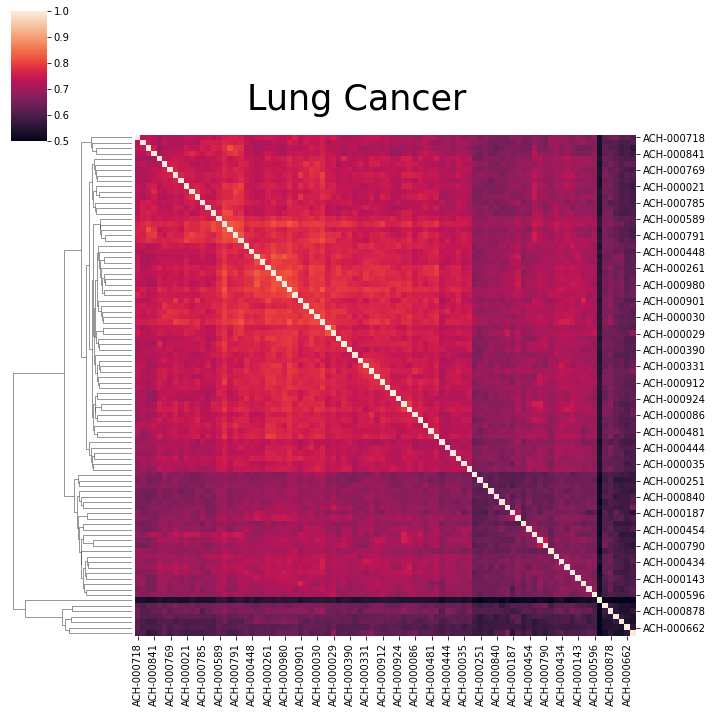

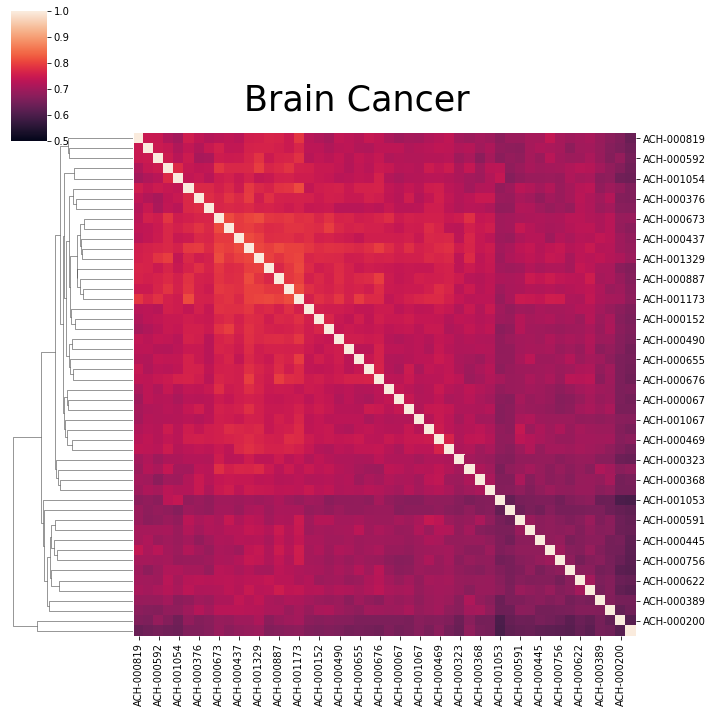

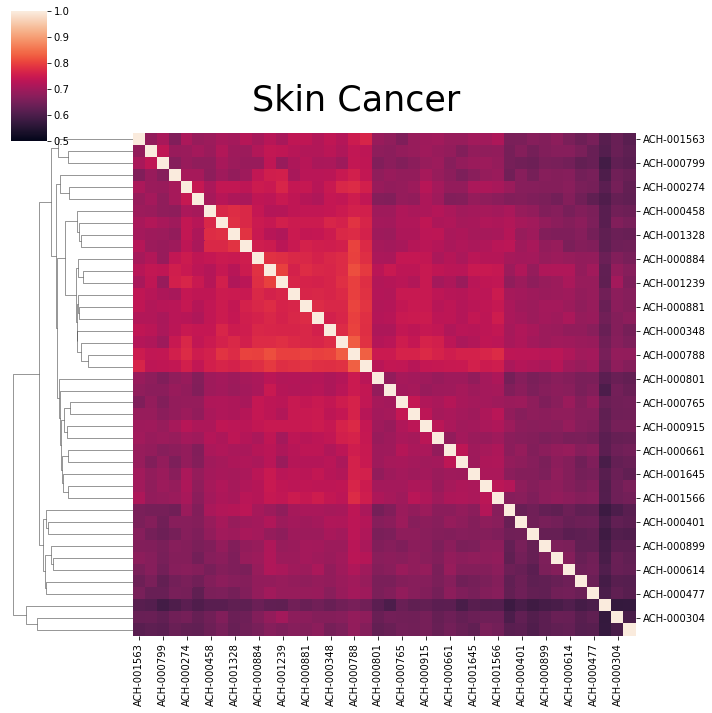

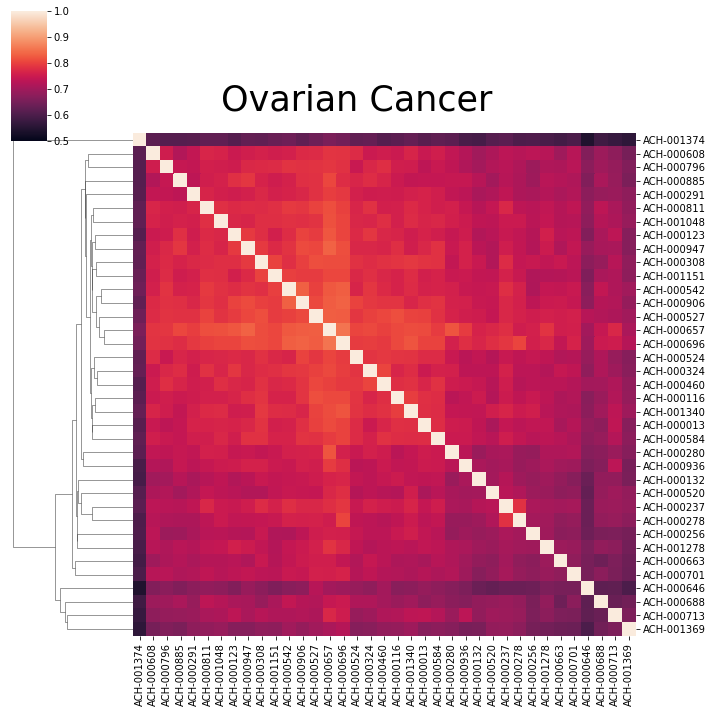

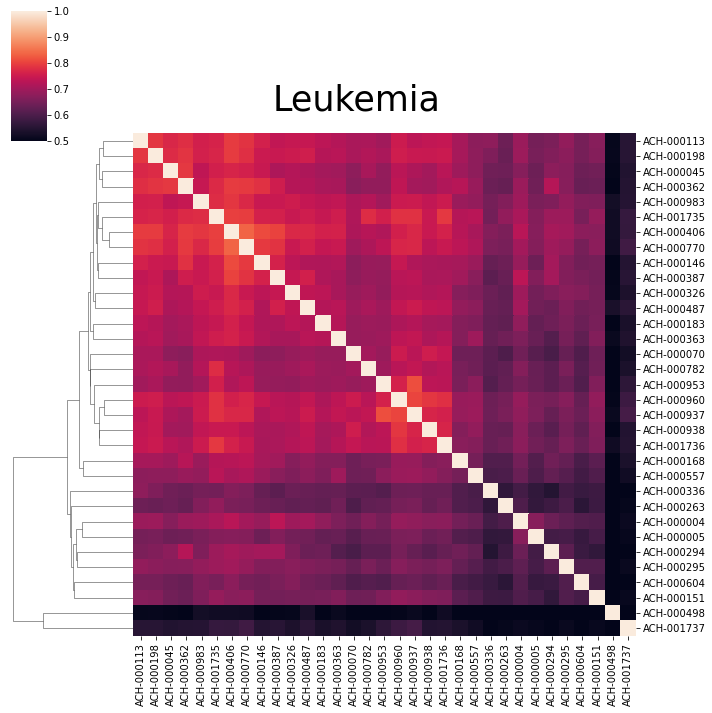

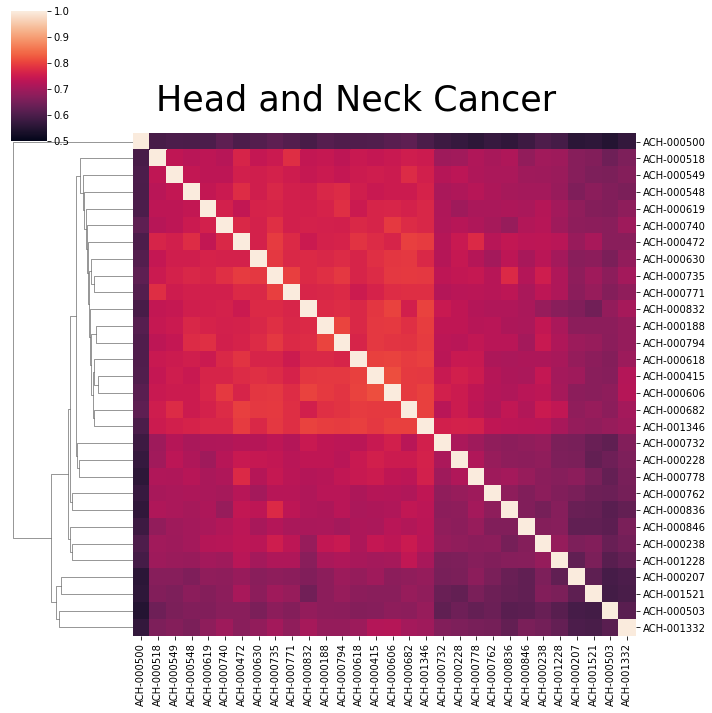

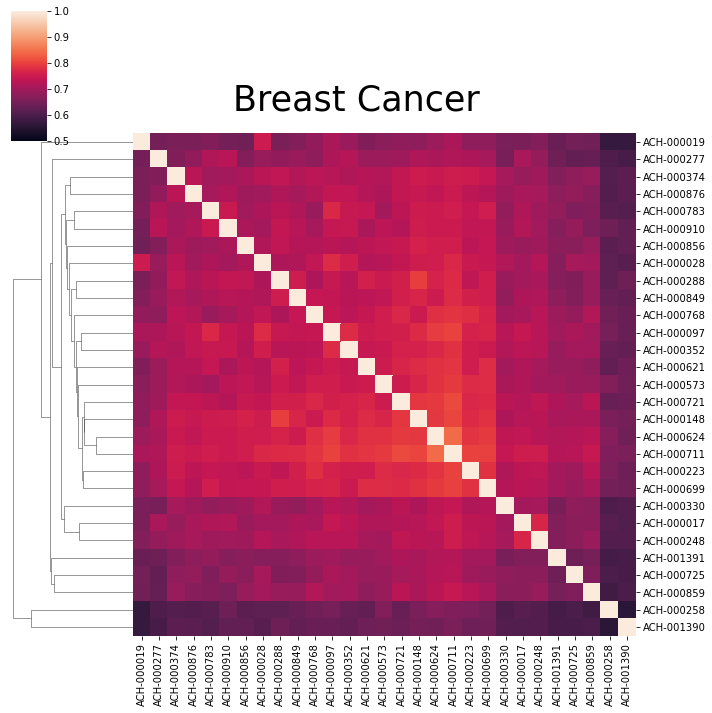

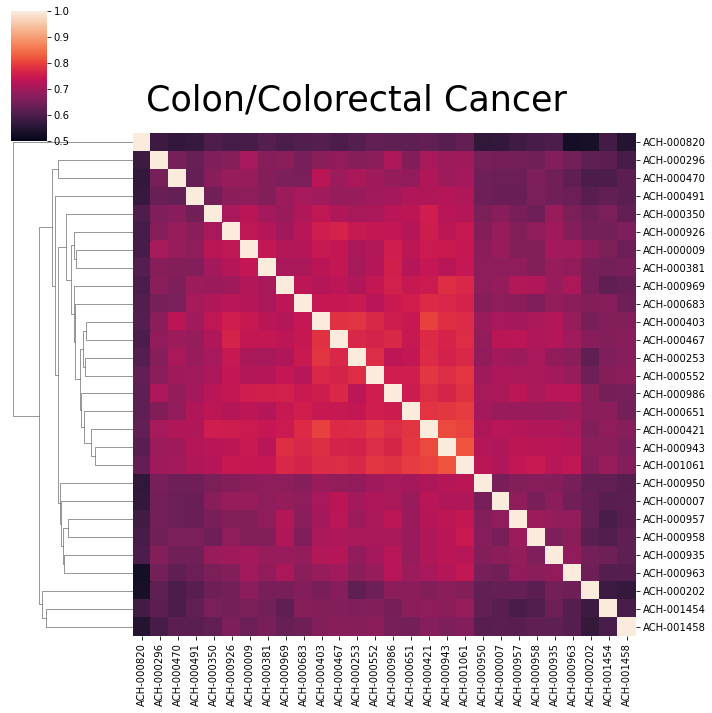

In [78]:
for s in sites:
    cm = sns.clustermap(gene_corr.loc[metadata[s],metadata[s]], vmin = 0.5)
    cm.fig.suptitle(s, fontsize=35, y=0.88) 
    cm.ax_col_dendrogram.set_visible(False)
    cm

In [84]:
site_stats = {}
for s in sites:
    ms = gene_corr.loc[metadata[s],metadata[s]]
    stats = pd.DataFrame(index=ms.index,columns=['std','mean','median'])
    stats['std'] = [ms.loc[g].std() for g in ms.index]
    stats['mean'] = [ms.loc[g].mean() for g in ms.index]
    stats['median'] = [ms.loc[g].median() for g in ms.index]
    stats = stats.sort_values(by = ["mean"])
    site_stats[s] = stats.head()

In [85]:
site_stats

{'Lung Cancer':                  std      mean    median
 ACH-000916  0.053033  0.538724  0.537793
 ACH-000662  0.048826  0.604871  0.605158
 ACH-000700  0.050826  0.608494  0.608763
 ACH-000695  0.052130  0.613118  0.610550
 ACH-000257  0.049333  0.622159  0.625332,
 'Brain Cancer':                  std      mean    median
 ACH-000244  0.053798  0.658823  0.652780
 ACH-000200  0.053333  0.668604  0.662429
 ACH-001053  0.053003  0.683353  0.679901
 ACH-000075  0.050699  0.684108  0.681836
 ACH-000464  0.051052  0.693344  0.691544,
 'Skin Cancer':                  std      mean    median
 ACH-000810  0.063112  0.622983  0.617004
 ACH-000404  0.060353  0.646038  0.636319
 ACH-000304  0.060744  0.651406  0.641731
 ACH-000450  0.058513  0.664917  0.656869
 ACH-000477  0.058320  0.666386  0.658415,
 'Ovarian Cancer':                  std      mean    median
 ACH-001374  0.067679  0.623649  0.618304
 ACH-000646  0.064209  0.671993  0.671989
 ACH-001369  0.061734  0.677281  0.672871
 ACH-0006